In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("mHealth_subject1.log", header=None, delim_whitespace=True)

In [6]:
'''
    INPUT : 
        - Label, the label ID of the activity. (The labels are defined later in the code to ease the use)
        - DataFrame, with the format described in http://archive.ics.uci.edu/ml/datasets/mhealth+dataset
        - Lead : 1 or 2 
    OUTPUT :
        - the ECG - Lead 1 readings
         (to return ECG lead 2, pass the parameter lead=2)

'''
def extractECG(label,dataFrame,lead=1):
    if lead == 1:
        lead = 3
    else :
        lead = 4
        
    data = dataFrame[lead][df[23]==label]
    data = data.reset_index()
    data.columns=["index","readings"]
    return data['readings']


'''
This function is used to convert ECG data to Heart Rate

INPUT : 
    - ECG       : ECG data as an array
    - dataRate  : The rate by which the data was obtained
    - threshold : The value above which a reading is considered as a pulse. 

OUTPUT :
    - Heart Rate Per Minute
'''
def getPulsePerMinute(ECG,dataRate,threshold=0.7):
    dataRate=int(dataRate)
    beats = 0
    for j in range(int(len(ECG))):
        if ECG[j]>threshold:
            beats+=1
    numberOfSeconds = (len(ECG)/float(dataRate))
    
    return 60*float(beats)/numberOfSeconds

def getHeartRateFromECG(ECG,dataRate,threshold=0.7,interval=3):
    dataRate=int(dataRate)
    beats = 0
    counter=0
    numberOfSeconds=0
    print("Seconds       Beats        AvgBeats")
    for j in range(1,int(len(ECG)-1)):
        if (ECG[j]-ECG[j-1]) + (ECG[j]-ECG[j+1]) >threshold:
            beats+=1
        if j%(dataRate*interval)==0:
            numberOfSeconds+=interval
            print("", numberOfSeconds, "       ", beats,"       ",60*float(beats)/interval)
            beats=0
#             print("avg heart rate : " , 60*float(beats)/numberOfSeconds)
            
#     numberOfSeconds = (len(ECG)/float(dataRate))
#     print(" Seconds : " , numberOfSeconds)
#     print("avg heart rate : " , 60*float(beats)/numberOfSeconds)
    return float(beats)
    
    return 60*float(beats)/numberOfSeconds
         

In [7]:
L_Standing_still = 1 
L_Sitting_and_relaxing = 2 
L_Lying_down = 3 
L_Walking = 4 
L_Climbing_stairs = 5 
L_Waist_bends_forward = 6 
L_Frontal_elevation_of_arms = 7 
L_Knees_bending = 8 
L_Cycling = 9 
L_Jogging = 10 
L_Running = 11 
L_Jump_front_and_back = 12 


In [8]:
def scaleBetween(unscaledNum, minAllowed, maxAllowed, minNum, maxNum) :
    return (maxAllowed - minAllowed) * (unscaledNum - minNum) / (maxNum - minNum) + minAllowed

In [9]:
# Procesa Data (Standardises the data by mapping the values to a range [-1,1] given the max/min values in the window)
# I used a window size equal to the frequency, i.e. 50
for j in range(1,11):
    print(j)
    df = pd.read_csv("mHealth_subject"+str(j)+".log", header=None, delim_whitespace=True)
    data = df[df[23].isin([1,2,3,4,5,6,7,8,9,10,11,12])]
    data = data.iloc[:,[3,23]]
    freq = 50
    counter = 0
    for i, row in data.iterrows():
        if counter%freq == 0:
            maxVal = data[3][counter:counter+freq+1].max()
            minVal = data[3][counter:counter+freq+1].min()
        data[3].at[i] = scaleBetween(data[3].at[i],-1,1,minVal,maxVal)
        counter+=1
    data['index'] = data.index
    data = data[['index',3,23]]
    np.savetxt("mHealth_ECGProcessed_subject"+str(j)+".log", data.values, fmt='%d %lf %d')

1


PermissionError: [Errno 13] Permission denied: 'mHealth_ECGProcessed_subject1.log'

In [ ]:
df = pd.read_csv("mHealth_subject3.log", header=None, delim_whitespace=True)
%matplotlib inline
data = extractECG(L_Sitting_and_relaxing,df)
data[50:200].plot()
plt.show()
for i in range(len(data)):
    data[i] = scaleBetween(data[i],-1,1,data.min(),data.max())
data[50:200].plot()
plt.show()

In [ ]:
data[50:200].plot()

In [25]:
df.loc[df[2]==1][1]

0       0.618311
1       0.916029
2       0.923670
3       0.687020
4       0.259544
5      -0.038168
6      -0.160305
7      -0.221378
8      -0.213738
9      -0.160305
10     -0.183206
11     -0.114503
12     -0.160305
13     -0.183206
14     -0.145037
15     -0.183206
16     -0.183206
17     -0.175573
18     -0.229000
19     -0.190839
20     -0.236641
21     -0.213738
22      0.007633
23     -0.061068
24     -0.190839
25     -0.221378
26     -0.236641
27     -0.297709
28      0.656495
29      1.000000
          ...   
3042   -0.342237
3043   -0.395722
3044   -0.406414
3045   -0.406414
3046   -0.288767
3047    1.000000
3048   -1.000000
3049   -0.641712
3050   -0.492965
3051   -0.430989
3052   -0.385919
3053   -0.323947
3054   -0.250708
3055   -0.121127
3056    0.087321
3057    0.267601
3058    0.340838
3059    0.205628
3060   -0.109863
3061   -0.391553
3062   -0.487326
3063   -0.498590
3064   -0.470423
3065   -0.459159
3066   -0.476062
3067   -0.425356
3068   -0.442256
3069   -0.4478

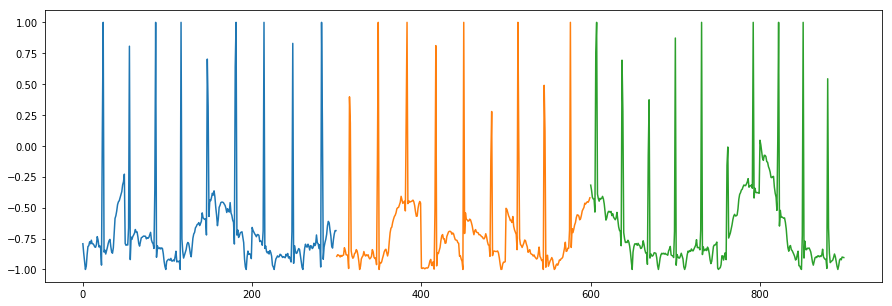

In [43]:
#Data Clarity Check
df = pd.read_csv("mHealth_ECGProcessed_subject3.log", header=None, delim_whitespace=True)
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
df.loc[df[2]==1][1][0:300].plot()
df.loc[df[2]==1][1][1*300:2*300].plot()
df.loc[df[2]==1][1][2*300:3*300].plot()
plt.show()
# for i in range(1,13):
# for i in range(0,3000,100):
#     df.loc[df[2]==1][1][i:i+100].plot()
#     df.loc[df[2]==1][1][i+100:i+200].plot()
#     plt.show()
# print(getHeartRateFromECG(data,50,0.7,20))


In [ ]:
#ECG Count Test
labels = ["Standing_still", "Sitting_and_relaxing", "Lying_down" ,"Walking" , "Climbing_stairs", "Waist_bends_forward" ,"Frontal_elevation_of_arms" ,"Knees_bending" ,"Cycling","Jogging","Running" ,"Jump_front_and_back"]
for j in range(1,11):
    print(j)
    df = pd.read_csv("mHealth_ECGProcessed_subject"+str(j)+".log", header=None, delim_whitespace=True)
    for i in range(1,13):
        data = df[1][df[2]==i]
        data = data.reset_index()
        data = data[1]
        testdata = data[:].values
        outputToFile(testdata,50,1.0,3,"subject"+str(j)+".log",labels[i-1])

# print(getHeartRateFromECG(testdata,50,1.0,3))




In [ ]:
def outputToFile(ECG,dataRate,threshold=0.7,interval=3,fileName="untitled.log",Activity="Unnamed"):
    import os
    flag =  os.path.isfile('./'+ fileName)
    F = open(fileName,"a+")
    dataRate=int(dataRate)
    beats = 0
    counter=0
    numberOfSeconds=0
    if not flag :
        F.write("Activity_Label,Heart_Rate,Time\n")
    for j in range(1,int(len(ECG)-1)):
        if (ECG[j]-ECG[j-1]) + (ECG[j]-ECG[j+1]) >threshold:
            beats+=1
        if j%(dataRate*interval)==0:
            numberOfSeconds+=interval
            string = ""+ Activity + ","+str(60*float(beats)/interval)+","+str(numberOfSeconds)
#             print(string)
            F.write(string)
            F.write("\n")
            beats=0
    F.close()
